In [14]:
#11th notebook

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# lib that does feature hashing, and scales well to large data and good for online learning
from sklearn.feature_extraction import FeatureHasher   

In [15]:
hasher = FeatureHasher(n_features = 5, input_type = "dict")

In [20]:
random_dict = hasher.fit_transform([
    {"a":1, "b": 2},
    {"a": 0, "c": 5}])

In [22]:
random_dict # 2x5 means 2 records(dict here) rep using 5 features

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [23]:
random_dict.toarray()

array([[ 1., -2.,  0.,  0.,  0.],
       [ 0.,  0., -5.,  0.,  0.]])

In [26]:
# feature hasher on pairs(tuples)
hasher_pair = FeatureHasher(n_features = 5, input_type = "pair")

In [29]:
random_pair= hasher_pair.fit_transform([
    [("a", 1), ("b", 2)],
    [("a", 0), ("c", 5)]
])

In [30]:
random_pair

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [31]:
# feature hasher on text(normal use of this)

text = ["This is me fool",
       "Hi, my name is sman",
       "The best team in england is chelsea",
       "I think Nigeria is cursed"]

In [33]:
hasher = FeatureHasher(n_features = 8, input_type = "string")

In [34]:
hashed_features = hasher.fit_transform(text)

In [35]:
hashed_features

<4x8 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

***
***Feature hasher on real dataset***

In [36]:
ozone_reading = pd.read_csv("./datasets/ozone_reading.csv")

ozone_reading.sample(6)

,Month,Day_of_month,ozone_reading,pressure_height,Wind_speed,Humidity,Inversion_temperature,Visibility
73,April,28,8.68,5650,6,46,37.94,150
62,April,12,4.81,5560,4,65,35.24,140
23,February,10,4.08,5560,10,72,37.58,300
71,April,26,12.23,5700,5,41,58.10,40
35,March,2,3.22,5470,7,46,29.30,300
97,June,17,10.77,5830,6,64,68.72,80


In [37]:
ozone_reading.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [38]:
ozone_reading.describe()

,Day_of_month,ozone_reading,pressure_height,Wind_speed,Humidity,Inversion_temperature,Visibility
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,14.980583,10.254175,5696.796117,5.174757,56.786408,56.254563,137.368932
std,8.465594,7.076096,116.056220,1.997190,18.472370,14.482588,84.619910
min,1.000000,1.800000,5320.000000,0.000000,19.000000,27.500000,2.000000
25%,8.000000,4.815000,5645.000000,4.000000,46.000000,45.680000,75.000000
50%,14.000000,8.680000,5710.000000,5.000000,61.000000,56.300000,120.000000
75%,22.000000,13.530000,5770.000000,6.000000,70.500000,66.020000,200.000000
max,31.000000,33.040000,5890.000000,11.000000,92.000000,89.780000,350.000000


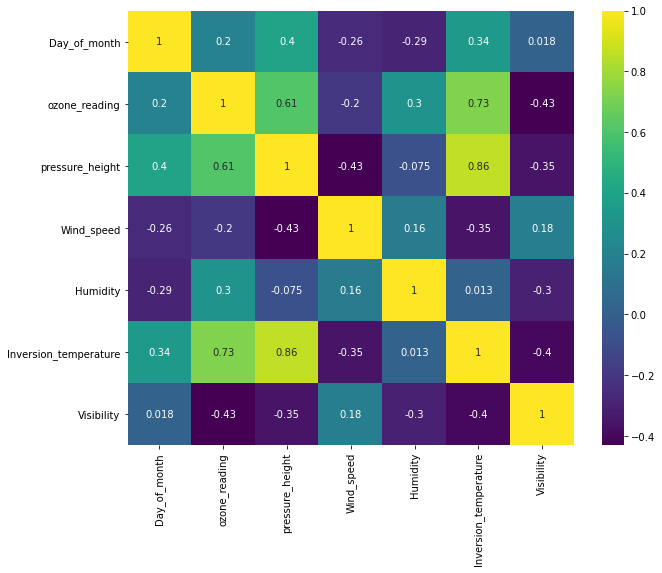

In [40]:
ozone_reading_correlation = ozone_reading.corr()

ozone_reading_correlation

fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(ozone_reading_correlation,
           annot = True,
           cmap = "viridis")

plt.show();

In [41]:
# feature hasher
fh = FeatureHasher(n_features = 4, input_type = "string")

In [45]:
hashed_features = fh.fit_transform(ozone_reading["Month"])

In [46]:
hashed_features = hashed_features.toarray()

hashed_features[:8]

array([[0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.]])

In [47]:
# cat to rep the hashed values
hashed_categories = ["month_hash_0", "month_hash_1", "month_hash_2", "month_hash_3"]

In [49]:
hashed_df = pd.DataFrame(hashed_features, columns = hashed_categories, dtype = np.int)

hashed_df.sample(7)

,month_hash_0,month_hash_1,month_hash_2,month_hash_3
85,0,0,3,0
65,1,0,0,0
26,1,1,1,1
71,1,0,0,0
83,0,0,3,0
80,0,0,3,0
57,1,0,0,0


In [51]:
# concat original df and hashed df
hashed_ozone_reading = pd.concat([ozone_reading, hashed_df], axis = 1)

hashed_ozone_reading.sample(5)

,Month,Day_of_month,ozone_reading,pressure_height,Wind_speed,Humidity,Inversion_temperature,Visibility,month_hash_0,month_hash_1,month_hash_2,month_hash_3
27,February,18,12.77,5770,3,82,58.28,40,1,1,1,1
60,April,8,5.09,5550,7,63,37.22,250,1,0,0,0
31,February,25,10.27,5720,6,63,59.18,150,1,1,1,1
8,January,15,3.94,5830,3,19,75.74,250,0,1,3,1
50,March,25,13.94,5720,4,71,56.30,60,0,-1,2,0


In [52]:
# drop oringinal month column, no use again
hashed_ozone_reading.drop(columns = ["Month"], inplace = True)

In [53]:
X = hashed_ozone_reading.drop("ozone_reading", axis = 1)
y = hashed_ozone_reading.ozone_reading

In [54]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X, y)

print("Training score: ", linear_model.score(X, y))

Training score:  0.711599661028506
